In [1]:
# 케라스를 사용하여 데이터셋 적재하기
import keras
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape) # (60000, 28, 28)
print(X_train_full.dtype) # uint8

Using TensorFlow backend.


(60000, 28, 28)
uint8


In [2]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 12s 6ms/step - loss: 1.0080 - accuracy: 0.6764 - val_loss: 0.5268 - val_accuracy: 0.8168
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5108 - accuracy: 0.8239 - val_loss: 0.4558 - val_accuracy: 0.8476
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4533 - accuracy: 0.8430 - val_loss: 0.4098 - val_accuracy: 0.8634
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4222 - accuracy: 0.8512 - val_loss: 0.4230 - val_accuracy: 0.8574
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4025 - accuracy: 0.8583 - val_loss: 0.4019 - val_accuracy: 0.8598
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3807 - accuracy: 0.8658 - val_loss: 0.3893 - val_accuracy: 0.8618
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3699 - accuracy: 0.8711 - val_loss: 0.3613 - val_ac

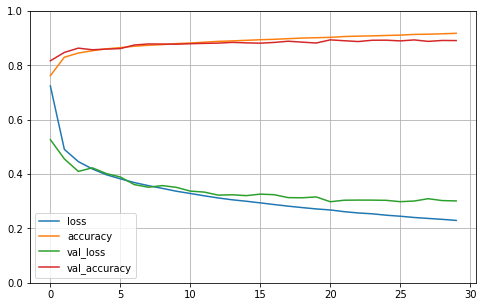

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [11]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    Dense(1) # 하나의 값을 예측하기 때문에 1 (활성화 함수 X)
])
model.compile(loss='mse', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/2
363/363 [==============================] - 2s 6ms/step - loss: 1.3731 - val_loss: 0.5352
Epoch 2/2
162/162 [==============================] - 1s 3ms/step - loss: 1.8484


In [7]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

checkpoint_cb = ModelCheckpoint('my_keras_model.h5',
                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = load_model("my_keras_model.h5")

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_cb = EarlyStopping(patience=10,
                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])